In [1]:
#Read in libraries
import pandas as pd
import swifter

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

In [2]:
#Set style for matplotlib
plt.style.use('ggplot')

In [3]:
#Set options for pandas
pd.options.display.max_columns =1_000
pd.set_option('display.max_rows', 1_000)

#Surpress future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [4]:
#Read in data

path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Air BnB - SF\Data\04_Models'

#Read in listings data
listings = pd.read_csv(path + '/01_19_2020_Listings_Processed.csv',  index_col=0)

#Ordinal variables to convert to category
ordinals = ['review_scores_accuracy', 'review_scores_checkin','review_scores_cleanliness', 
            'review_scores_communication','review_scores_location','review_scores_rating',
            'review_scores_value']

#Convert 
listings[ordinals] = listings[ordinals].astype('category')

# Preview Data

In [5]:
print('Listings shape: ', listings.shape)
listings.head()

Listings shape:  (65767, 469)


,accommodates,availability_30,availability_365,bathrooms,bedrooms,beds,chlc,chlc_private_rooms,chlc_shared_rooms,cleaning_fee,extra_people,guests_included,host_identity_verified,host_is_superhost,host_response_rate,instant_bookable,is_location_exact,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,price,require_guest_phone_verification,require_guest_profile_picture,requires_license,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,reviews_per_month,security_deposit,total_amenities,24-hour,Accessible-height,Air,Amazon,BBQ,Baby,Babysitter,Balcony,Bath,Bathroom,Bathtub,Beach,Beachfront,Bed,Bedroom,Bidet,Body,Breakfast,Building,Buzzer/wireless,Cable,Carbon,Cat(s),Ceiling,Central,Changing,Children’s,Cleaning,Coffee,Convection,Cooking,Crib,DVD,Day,Disabled,Dishes,Dishwasher,Dog(s),Doorman,Double,Dryer,Echo,Electric,Elevator,Espresso,Essentials,Ethernet,Exercise,Extra,Family/kid,Fax,Fire,Fireplace,Firm,First,Fixed,Flat,Formal,Free,Full,Game,Garden,Gas,Ground,Gym,HBO,Hair,Hammock,Handheld,Hangers,Heat,Heated,Heating,High,High-resolution,Host,Hot,Indoor,Internet,Iron,Jetted,Keypad,Kitchen,Kitchenette,Lake,Laptop,Lock,Lockbox,Long,Luggage,Memory,Microwave,Mini,Mobile,Mountain,Mudroom,Murphy,Netflix,Other,Outdoor,Outlet,Oven,Pack,Paid,Patio,Pets,Pillow-top,Play/travel,Pocket,Pool,Printer,Private,Projector,Rain,Refrigerator,Roll-in,Room-darkening,Safety,Self,Shampoo,Shared,Shower,Single,Ski-in/Ski-out,Smart,Smoke,Smoking,Soaking,Sound,Stair,Stand,Standing,Step-free,Stove,Suitable,Sun,Table,Tennis,Terrace,Toilet,Walk-in,Warming,Washer,Waterfront,Well-lit,Wheelchair,Wide,Wifi,Window,Wine,access,accessible,aid,air,allowed,alone,and,area,around,backyard,balcony,bars,basics,bath,bathroom,bed,bedroom,before,blankets,books,card,chair,charger,check-in,checkout,clearance,comforts,computer,conditioning,connection,console,cooler,corner,court,covers,crib,detector,dining,dinnerware,door,doorway,drawer,dropoff,dryer,en.hosting_amenity_49,en.hosting_amenity_50,enter,entrance,entryway,equipment,essentials,events,extinguisher,fan,fireplace,floor,floors,foam,for,fridge,friendly,front,gates,grab,greets,grill,guards,guest,guests,gym,hallway,hallways,head,hoist,home,hot,intercom,kettle,kit,kitchen,lamps,level,linens,live,living,lock,loungers,machine,maker,mattress,missing:,monitor,monoxide,off,oven,paper,parking,path,pet(s),pillows,pit,player,pool,premises,profiling,property,rack,recommendations,room,screen,seating,shades,shower,silverware,soap,space,spot,staff,stairs,stays,steam,steps,street,suite,system,table,term,this,toilet,towel,toys,translation,tub,valet,view,water,wifi,with,workspace,you,None,email,facebook,google,government_id,identity_manual,jumio,kba,manual_offline,manual_online,offline_government_id,phone,photographer,reviews,selfie,sent_id,weibo,work_email,zhima_selfie,host_identity_verified.1,host_is_superhost.1,instant_bookable.1,is_location_exact.1,require_guest_phone_verification.1,require_guest_profile_picture.1,requires_license.1,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Daly City,city_San Francisco,city_South San Francisco,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,market_San Francisco,neighbourhood_cleansed_Bayview,neighbourhood_cleansed_Bernal Heights,neighbourhood_cleansed_Castro/Upper Market,neighbourhood_cleansed_Chinatown,neighbourhood_cleansed_Crocker Amazon,neighbourhood_cleansed_Diamond Heights,neighbourhood_cleansed_Downtown/Civic Center,neighbourhood_cleansed_Excelsior,neighbourhood_cleansed_Financial District,neighbourhood_cleansed_Glen Park,neighbourhood_c

# Split Data into Training and Test Sets

In [6]:
#Prepare data for splitting into train and test sets
X= listings.drop(columns='price').values
y= listings['price'].values

#Check shapes
print('X shape: ', X.shape)
print('y shape: ', y.shape)

X shape:  (65767, 468)
y shape:  (65767,)


In [7]:
#Import models
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.model_selection import train_test_split

#Split data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   random_state=42)

#Check shapes
print('Training data shape: {}'.format(X_train.shape))
print('Test data shape: {}'.format(X_test.shape))

Training data shape: (49325, 468)
Test data shape: (16442, 468)


xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

In [8]:
#Import models
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


# Feature Selection

## Import libraries

In [9]:
#Import ...
#Scaler
from sklearn.preprocessing import StandardScaler

#Feature_selection models
from sklearn.feature_selection import SelectFromModel, SelectKBest, chi2,VarianceThreshold

#Remove low variance features
from sklearn.ensemble import ExtraTreesRegressor

#Pipeline
from sklearn.pipeline import Pipeline

#CV
from sklearn.model_selection import cross_validate

## Initial preprocessing pipeline

In [34]:
feature_importance = ExtraTreesRegressor(n_estimators=50, n_jobs=-1,verbose=1,#
                                        random_state=42)

#Create pipeline that scales data, removes low variance feats and extracts feat importances
preprocessor = Pipeline(steps = [('Normalizer', StandardScaler()),#Step1. Normalize training data
    ('Variance_Selector', VarianceThreshold(threshold=(.8 * (1 - .8)))),#Step2.Remove low variance features
    ('Feature_Importances',feature_importance)]) #Step3.Select Features

#Fit to data
preprocessor.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.0min finished


Pipeline(memory=None,
         steps=[('Normalizer',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('Variance_Selector',
                 VarianceThreshold(threshold=0.15999999999999998)),
                ('Feature_Importances',
                 ExtraTreesRegressor(bootstrap=False, criterion='mse',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=50, n_jobs=-1,
                                     oob_score=False, random_state=42,
                                     verbose=1, warm_start=False))],
         verbose=False)

## Feature Importances from Initial preprocessor pipeline

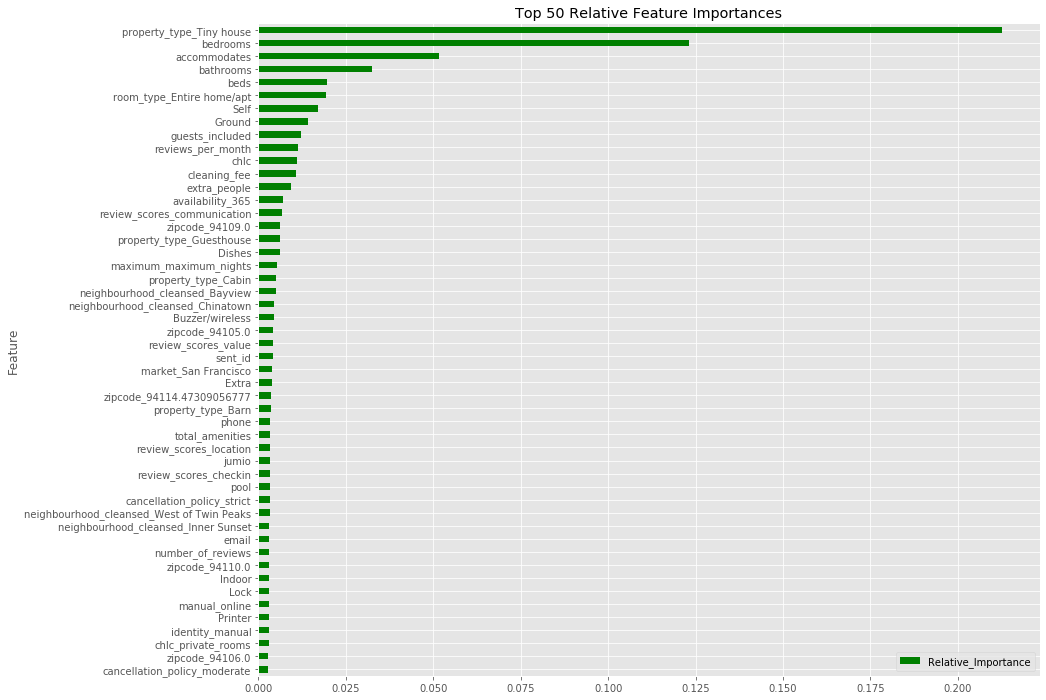

In [35]:
#Map feature_importances_ to listings columns and store as list
list_of_tuples = list(zip(listings.columns, preprocessor['Feature_Importances'].feature_importances_))

#Convert list to df. Capture top 50 features, sorted by Relative_Importance
df = pd.DataFrame(list_of_tuples, columns = ['Feature', 'Relative_Importance'])
top50 = df.sort_values(by = 'Relative_Importance', ascending = False).head(50)

#Visualize 
ax = top50.plot(kind = 'barh', x='Feature', figsize=(14,12),color = 'green', title = 'Top 50 Relative Feature Importances')
ax.invert_yaxis()

## Feature selection and transformation

In [28]:
#Create pipeline that scales data, removes low variance feats and extracts feat importances
preprocessor = Pipeline(steps = [('Normalizer', StandardScaler()),#Step1. Normalize training data
    ('Variance_Selector', VarianceThreshold(threshold=(.8 * (1 - .8)))),#Step2.Remove low variance features
    ('Feature_Importances',feature_importance)]) #Step3.Select Features

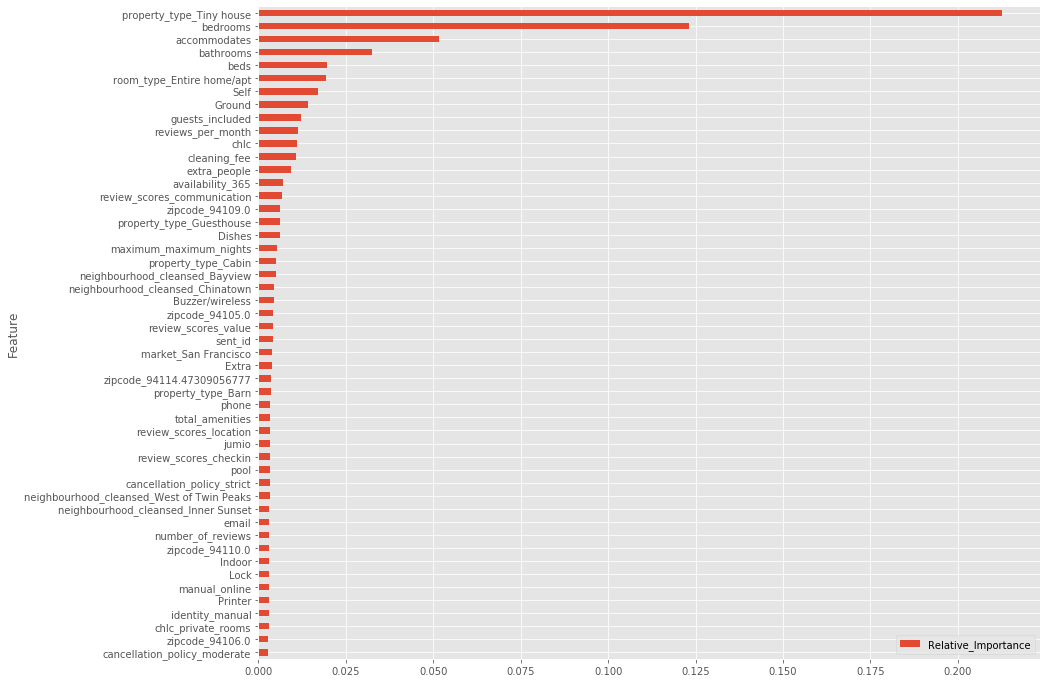

In [28]:
#Transform training data
#X_train_t = preprocessor.transform(X_train)

#View new training data shape after transformation
#print('New training data shape:', X_train_t.shape)

In [ ]:
#Supervised learning techniques
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

#Create list of regression models to iterate over and test in pipeline
regressors = [RandomForestRegressor(random_state = 42, n_jobs=-1), 
              GradientBoostingRegressor(random_state = 42), 
              BaggingRegressor(random_state = 42, n_jobs=-1),
             MLPRegressor(random_state = 42 ),
             DecisionTreeRegressor(random_state = 42)]

# Design base model pipeline

From a list of regressors, select the best model to optimize based on performance of initial application on training data

In [ ]:
#Run base models to see which performs best on training data
scoring = ['r2','neg_mean_absolute_error','neg_mean_squared_error']

In [ ]:
# for regressor in regressors:
#     pipe = Pipeline(steps=[('Model', regressor)], verbose=False) #Fit regressor
#     scores  = cross_validate(pipe,X_train_t, y_train,scoring=scoring, cv =5)
#     print('=============================================')
#     print(regressor)
#     print('Mean R2 Score: ', np.mean(scores['test_r2']))
#     print('Mean RMSE Score: ', np.mean(np.sqrt(scores['test_neg_mean_squared_error'])))
#     print('Mean MAE Score: ', np.mean(scores['test_neg_mean_absolute_error']))
#     print('=============================================')


#MSE “Mean squared error” is perhaps the most popular metric used for regression problems. 
#It essentially finds the average squared error between the predicted and actual values.

#MAE Mean absolute error (or mean absolute deviation) is another metric which finds the average 
#absolute distance between the predicted and target values.MAE is known to be more robust to the outliers than MSE


RandomForestRegressor will be the model of choice. Let's see if we can reduce that average MSE.

# Tune Hyperparameters

## Random Search

In [ ]:
print('Random Forest parameters: ', RandomForestRegressor().get_params)

In [ ]:
#Set values for RandomForestRegressor hyperparameters
max_depth = [15,20, 25, 30]

max_features= ['auto', 'sqrt', 'log2']

n_estimators = [100, 125, 150]

bootstrap=[True, False]

min_samples_leaf = [1,3,5]

param_grid = {'max_depth' : max_depth,
            'max_features':max_features,
            'n_estimators':n_estimators,
            'bootstrap': bootstrap,
            'min_samples_leaf' : min_samples_leaf,
}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
RFR_random = RandomizedSearchCV(RandomForestRegressor(random_state = 42, n_jobs=-1), param_distributions= param_grid, n_jobs=-1,
                           scoring = scoring,refit='r2',
                                verbose =1)

print('View random_model parameters: ', RFR_random.get_params)

In [ ]:
# RFR_random.fit(X_train_t, y_train)

In [ ]:
# print('Best score from ',RFR_random.best_score_)

# RFR_random.best_params_

## Gridsearch

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#Set values for RandomForestRegressor hyperparameters
max_depth = [24,25,27]

max_features= ['log2']

n_estimators = [100,120,140]

bootstrap=[False]

min_samples_leaf = [1,2]

param_grid = {'max_depth' : max_depth,
            'max_features':max_features,
            'n_estimators':n_estimators,
            'bootstrap': bootstrap,
            'min_samples_leaf' : min_samples_leaf,
}

In [ ]:
#Create GridSearch
RFR_optimized = GridSearchCV(RandomForestRegressor(random_state = 42, n_jobs=-1), param_grid=param_grid,
                        n_jobs= -1, scoring=scoring,refit='r2', verbose=1)

#Fit to data
RFR_optimized.fit(X_train_t, y_train)

In [ ]:
print(RFR_optimized.best_score_)

RFR_optimized.best_params_

## Visualize the results

In [ ]:
np.sqrt(81)

In [ ]:
for feat, importance in zip(listings.columns, RFR_optimized.best_estimator_.feature_importances_):
    print('feature: {f}, importance: {i}'.format(f=feat, i=importance))

* Turn zip file ^ into a df
* View feature importaces as well as additional feature selection options
* If features do not seem to be helping, PCA might be an option?
* optimized MSE is 272 which is not good(does that mean esitmates are off by $272?)
* Are we using the right metrics?

In [ ]:
def feature_importances(model, training_data):
    df= pd.DataFrame(model.best_estimator_.feature_importances_, columns='Importance', index = training_data.columns)
    df.plot(kind = 'bar', x='Importance', )

# Deploy